# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
# смотрим таблицу и общую информацию о ней:

import pandas as pd
data = pd.read_csv("data.csv")
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Вывод** В таблице встречаются отсутствующие значения (NaN), подозрительные аномалии (отрицательный рабочий стаж), в некоторых столбцах разнобой с регистрами, отсутствует внятная классификация в столбце "purpose", в результате одни и те же цели могут иметь разное наименование (например, "покупка жилья" и "покупка жилой недвижимости").

## Шаг 2. Предобработка данных

### Обработка пропусков

In [2]:
# проверям, в каких столбцах есть пропуски и сколько их:    
#for column in data:
    #print(column, len(data[data[column].isna()]))
# пропуски однаружены только в двух столбцах: "days_employed" и "total_income", причем количество пропусков совпадает. 
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [3]:
# есть ли взаимосвязь между пропусками:
data[data['days_employed'].isnull()].head()
# судя по первым строкам таблицы, действительно NaN в обоих столбцах совпадает. Стоит проверить точнее.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


In [4]:
# для более точной проверки создаем 2 таблицы и смотрим, встречаются ли случаи, когда NaN значениям в трудовом стаже не 
# соответствуют NaN в доходе, и наоборот - в стаже не NaN, в доходе - NaN: 
compare_nans = data[data['days_employed'].isnull() & data['total_income'].notnull()]
print(compare_nans)
compare_nans_backwards = data[data['days_employed'].notnull() & data['total_income'].isnull()]
print(compare_nans_backwards)
# получили пустые DataFrame, следовательно NaN значения в трудовом стаже и в доходе совпадают полностью. 
# Вероятно, в некоторых случаях для получения кредита не требуется информация о трудоустройстве и доходе
# (незначительная сумма кредита, наличие обеспечения кредита за счет каких-либо активов).

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []
Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


In [5]:
# смотрим виды дохода и средний (медианный) доход для каждой категории - этим показателем будут заполнены пропуски в данных.
# Поскольку "total_income" является одним из ключевых показателей и важен для ответа на поставленные вопросы, медианное
# значение кажется оптимальным в данном случае, так как в отличие от среднего арифмитического, меньше подвержено влияюнию 
# аномальных значений. Вычисление медианы отдельно для для каждой категории заемщиков
# повышает точность расчетов.
print(data.groupby('income_type')['total_income'].median())
print(data['income_type'].value_counts())


income_type
безработный        131339.751676
в декрете           53829.130729
госслужащий        150447.935283
компаньон          172357.950966
пенсионер          118514.486412
предприниматель    499163.144947
сотрудник          142594.396847
студент             98201.625314
Name: total_income, dtype: float64
сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64


In [6]:
# расчет медианного дохода по категориям заемщиков:
for income_type in data['income_type'].unique():
    median_total_income_for_cat = data[data["income_type"] == income_type]['total_income'].median()

# Замена NaN значений в total_income медианой для соответствующей категории заемщиков:    
    data.loc[data['income_type'] == income_type, 'total_income'] = data.loc[data['income_type'] == \
income_type, "total_income"].fillna(median_total_income_for_cat)

# проверяем, остались ли пропущенные значения в доходах:
print(data['total_income'].isna().value_counts())
    

False    21525
Name: total_income, dtype: int64


In [7]:
# это старый вариант
# обработка пропусков в days_employed. Поскольку эти данные для решения поставленной задачи не нужны, заполняем пропуски нулями.
#data['days_employed'] = data['days_employed'].fillna(value = "0.00")

#проверка на оставшиеся пропуски: 
#for column in data:
    #print(column, len(data[data[column].isna()]))

In [8]:
# так как пропущенные значения в "days_employed" будем восстанавливать, ориентируясь на возраст заёмщика, проверяем
# пропуски и аномальные значения в "dob_years":
print(data['dob_years'].sort_values())
print(data['dob_years'].isna().sum())
# пропущенных значений нет, но есть возраст "0", что точно ошибка.

6859      0
16042     0
7034      0
21179     0
4147      0
         ..
3460     74
4895     74
19642    74
11532    74
8880     75
Name: dob_years, Length: 21525, dtype: int64
0


In [9]:
# Заполняем возраст "0" средним возрастом соответствующей по типу занятости группы:

mean_age = data.groupby('income_type')['dob_years'].transform('mean')
data.loc[data['dob_years'] == 0, "dob_years"] = mean_age

print(data['dob_years'].sort_values())     

1981     19.0
12047    19.0
11749    19.0
20230    19.0
766      19.0
         ... 
11532    74.0
3460     74.0
4895     74.0
12317    74.0
8880     75.0
Name: dob_years, Length: 21525, dtype: float64


In [10]:
# в стаже устраняем строковые значения :
data['days_employed'] = pd.to_numeric(data['days_employed'], errors="ignore")

# пропуски заменяем медианным стажем с учетом возраста:
days_employment_median = data.groupby('dob_years')['days_employed'].transform('median')
data.loc[data['days_employed'].isnull(), "days_employed"] = days_employment_median
data['days_employed'].isna().sum()


0

In [11]:
# избавляемся от отрицательных значений и приводим к целым числам, проверяем на наличие аномальных значений:
data['days_employed'] = data['days_employed'].abs().astype(int)
data['days_employed'].sort_values()
# аномальные значения есть: 401755 / 365 = 1100 лет трудового стажа. 


8336         24
17437        24
6157         30
9683         33
2127         34
          ...  
7794     401663
2156     401674
7664     401675
10006    401715
6954     401755
Name: days_employed, Length: 21525, dtype: int64

In [12]:
# получаем более подробную информацию по аномальным значениям и возможным закономерностям.
# Аномальные значения определяю таким образом: 
# трудовой стаж > (возраст заёмщика - 14) * 365
# 14 - потому что до этого возраста трудовые контракты, за редким исключением, не заключаются.
data[(data['days_employed'] > data['dob_years'].subtract(14) * 365)]
# 3874 строки с аномальным трудовым стажем, на первый взгляд все такие заемщики - пенсионеры. 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
12,0,357103,65.0,среднее,1,гражданский брак,1,M,пенсионер,0,118514.486412,сыграть свадьбу
18,0,400281,53.0,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551,57.0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548,67.0,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904,53.0,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21508,0,386497,62.0,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,362161,59.0,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21518,0,373995,59.0,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем


In [13]:
# проверяем гипотезу, что все заемщики с аномальным трудовым стажем - пенсионеры:

data[(data['income_type'] == "пенсионер") & (data['days_employed'] > data['dob_years'].subtract(14) * 365)]


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
4,0,340266,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
12,0,357103,65.0,среднее,1,гражданский брак,1,M,пенсионер,0,118514.486412,сыграть свадьбу
18,0,400281,53.0,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля
24,1,338551,57.0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью
25,0,363548,67.0,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости
...,...,...,...,...,...,...,...,...,...,...,...,...
21505,0,338904,53.0,среднее,1,гражданский брак,1,M,пенсионер,0,75439.993167,сыграть свадьбу
21508,0,386497,62.0,среднее,1,женат / замужем,0,M,пенсионер,0,72638.590915,недвижимость
21509,0,362161,59.0,высшее,0,женат / замужем,0,M,пенсионер,0,73029.059379,операции с недвижимостью
21518,0,373995,59.0,СРЕДНЕЕ,1,женат / замужем,0,F,пенсионер,0,153864.650328,сделка с автомобилем


In [14]:
data[(data['income_type'] != "пенсионер") & (data['days_employed'] > data['dob_years'].subtract(14) * 365)]
# 138 заемщиков не-пенсионеров с аномальным трудовым стажем. Несмотря на тип занятости, видно, что все эти заемщики - пенсионного
# или предпенсионного возраста. То есть здесь какая-то системная ошибка при обработке данных заемщиков старшего возраста (вероятно, 
# какая-то проблема с трудовыми книжками старого образца, или стаж было принято счиать не в днях. Последнее можно проверить)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
242,0,331245,58.0,среднее,1,женат / замужем,0,F,госслужащий,0,150447.935283,покупка своего жилья
320,0,358482,63.0,среднее,1,вдовец / вдова,2,F,сотрудник,0,142594.396847,на покупку подержанного автомобиля
328,0,362313,69.0,среднее,1,вдовец / вдова,2,F,сотрудник,0,142594.396847,приобретение автомобиля
364,0,333953,57.0,среднее,1,гражданский брак,1,F,компаньон,0,172357.950966,заняться высшим образованием
397,0,12506,46.0,среднее,1,женат / замужем,0,F,сотрудник,0,292843.287967,недвижимость
...,...,...,...,...,...,...,...,...,...,...,...,...
20482,1,344372,59.0,среднее,1,женат / замужем,0,F,сотрудник,0,142594.396847,недвижимость
20662,0,331245,58.0,Среднее,1,гражданский брак,1,M,сотрудник,0,142594.396847,на проведение свадьбы
21057,0,354981,62.0,среднее,1,гражданский брак,1,M,сотрудник,0,142594.396847,свадьба
21102,0,349414,60.0,среднее,1,женат / замужем,0,M,сотрудник,0,142594.396847,строительство недвижимости


In [15]:
#  Так как у нас обнаружено 3736 пенсионеров с аномальным трудовым стажем (из 3856 пенсионеров всего), заменять здесь аномальные 
# значения медианой по типу дохода не имеет смысла - у пенсионеров медиана тоже будет аномальная.

In [16]:
# В ходе экспериментов обнаружено, что трудовой стаж, по всей видимости, указан в часах. Если поделить аномальные значения в 
#days_employed на 24, он во всех случаях приобретает правдоподобное, сообразующееся с возрастом значение. 
days_employed_new = data[data['days_employed'] > data['dob_years'].subtract(14) * 365]['days_employed']
days_employed_new = days_employed_new / 24
data.loc[data['days_employed'] >= data['dob_years'].subtract(14) * 365, ['days_employed']] = days_employed_new
data.head(15)
# итог: аномальные значения в days_employed заменены (предположительно) реальными. Из всех рассмотренных способов замены 
# этот представляется самым логичным.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.000000,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.000000,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.000000,33.0,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.000000,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,14177.750000,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,926.000000,27.0,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,2879.000000,43.0,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,152.000000,50.0,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,6929.000000,35.0,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,2188.000000,41.0,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Вывод**: Пропуски и аномальные значения обработаны, их наличие было связано с особенностями оформления кредита (по всей видимости, в некоторых случаях не тербуется предоставление информации о трудоустройстве и доходах), а также с системной ошибкой при обработке данных заемщиков старшего возраста.


### Замена типа данных

In [17]:
# исправление ошибок и аномалий по столбцам:
print(data['children'].value_counts())
# "-1" и "20" - явные ошибки (предполагаю, что 20 детей - опечатка, так как в данных не встречается 7, 10 или 15 детей:
# 5, потом сразу 20. Видимо, 5 включает в себя "5 и более"):
data['children'] = data['children'].abs()
data.loc[data['children'] == 20, "children"] = 2
print(data['children'].value_counts())      


 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64
0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64


In [18]:
# days_employed и total_income приводим в положительные целочисленные значения:
#data['days_employed'] = pd.to_numeric(data['days_employed']).abs().astype(int)
data['total_income'] = pd.to_numeric(data['total_income']).abs().astype(int)
print(data.dtypes)

children              int64
days_employed       float64
dob_years           float64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income          int64
purpose              object
dtype: object


In [19]:
# приводим к одному регистру:
data['education'] = data['education'].str.lower()
data['education'].head()


0     высшее
1    среднее
2    среднее
3    среднее
4    среднее
Name: education, dtype: object

**Вывод**: В данных встретились явные опечатки (отрицательный трудовой стаж и отрицательное количество детей), разнобой в регистре, значения типа object вместо чисел. Ошибки устранены, дробные числа для удобства переведены в целочисленные.

### Обработка дубликатов

In [20]:
#удаление полных дубликатов и проверка:
print(data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop=True)
print(data.duplicated().sum())
# учитывая степень точности наших данных, считаю обоснованным предположение, что полностью совпадающие строки (а только их
# выявляет метод duplicated(), являются появившимися вследствие какой-либо ошибки повторами уже внесенных данных. 
# Маловероятно, что у кого-либо могут совпадать одновременно не только количество детей и образование, но и доход с точностью 
# до рубля, и трудовой стаж с точностью до дня. Если бы данные в days_employed и total_income были менее точными
# (округленными до полных лет и сотен рублей, к примеру), такой метод можно было бы использовать только в случае получения
# дополнительной информации (id заёмщика).

71
0


In [21]:
# проверка по столбцам, в которых возможны неявные дубликаты:
print(data['education'].value_counts())
print(data['family_status'].value_counts())
print(data['income_type'].value_counts())
print(data['purpose'].value_counts())
# дубликаты только в столбце 'purpose' 

среднее                15172
высшее                  5250
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64
женат / замужем          12339
гражданский брак          4151
Не женат / не замужем     2810
в разводе                 1195
вдовец / вдова             959
Name: family_status, dtype: int64
сотрудник          11084
компаньон           5078
пенсионер           3829
госслужащий         1457
предприниматель        2
безработный            2
студент                1
в декрете              1
Name: income_type, dtype: int64
свадьба                                   791
на проведение свадьбы                     768
сыграть свадьбу                           765
операции с недвижимостью                  675
покупка коммерческой недвижимости         661
операции с жильем                         652
покупка жилья для сдачи                   651
операции с коммерческой недвижимостью     650
покупка жилья                       

**Вывод**: Скрытые дубликаты обнаружены только в столбце purpose: виды целей кредита не унифицированы, им не присвоены идентификаторы. Это затрудняет работу с информацией, так как "жилье" и "на покупку жилья" обрабатываются как разные цели, сложно получить сводную информацию.

### Лемматизация

In [22]:
# для целей кредита ('purpose') создаем отдельный столбец, содержащий лемматизированные значения. 
from pymystem3 import Mystem
m = Mystem()

stop_lemmas = ["\n", " "]
data['lemmas'] = data['purpose'].apply(m.lemmatize).apply(lambda lemmas: [l for l in lemmas if l not in stop_lemmas])


# посмотрим на все лемматихирвоанные значения, чтобы выделить ключевые слова для цнификации целей:
from collections import Counter
print(Counter(data['lemmas'].sum()))


Installing mystem to /Users/mania/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-macosx.tar.gz


Counter({'недвижимость': 6351, 'покупка': 5897, 'жилье': 4460, 'автомобиль': 4306, 'образование': 4013, 'с': 2918, 'операция': 2604, 'свадьба': 2324, 'свой': 2230, 'на': 2222, 'строительство': 1878, 'высокий': 1374, 'получение': 1314, 'коммерческий': 1311, 'для': 1289, 'жилой': 1230, 'сделка': 941, 'дополнительный': 906, 'заниматься': 904, 'проведение': 768, 'сыграть': 765, 'сдача': 651, 'семья': 638, 'собственный': 635, 'со': 627, 'ремонт': 607, 'подержанный': 486, 'подержать': 478, 'приобретение': 461, 'профильный': 436})


In [23]:
# унификация целей кредита (новые значения в отдельном столбце 'purpose_grouped'):
#real_estate_words = ["жилье", "недвижимость", "строительство"]
def purpose_grouped(lemmas):
    for lemma in lemmas:
        if "недвижимость" in lemmas or "жилье" in lemmas:
        #if lemma in real_estate_words:
            return "недвижимость"
        if 'автомобиль' in lemmas:
            return 'автомобиль'
        if 'образование' in lemmas:
            return 'образование'
        if 'свадьба' in lemmas:
            return 'свадьба'

data['purpose_grouped'] = data['lemmas'].apply(purpose_grouped)
data.head()
    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas,purpose_grouped
0,1,8437.00,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"[покупка, жилье]",недвижимость
1,1,4024.00,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"[приобретение, автомобиль]",автомобиль
2,0,5623.00,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"[покупка, жилье]",недвижимость
3,3,4124.00,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"[дополнительный, образование]",образование
4,0,14177.75,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"[сыграть, свадьба]",свадьба


In [24]:
# проверяем, остались ли цели кредита ("purpose"), не попавшие ни в одну из унифицированных категорий ('purpose_grouped') 
data['purpose_grouped'].value_counts()
data['purpose_grouped'].isnull().sum()
# не осталось

0

In [25]:
# удаляем лишние столбцы: "purpose" с неунифицированными целями и "lemmas" за ненадобностью:
data = data.drop(['purpose', 'lemmas'], axis = 1)
data.head()


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_grouped
0,1,8437.00,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость
1,1,4024.00,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль
2,0,5623.00,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость
3,3,4124.00,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование
4,0,14177.75,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба


In [26]:
# каждой цели кредита присваиваем свой id, добавляем соответствующий столбец в таблицу:
def purpose_id(purpose_grouped):
    if purpose_grouped == "недвижимость":
        return 1        
    if purpose_grouped == "образование":
        return 2
    if purpose_grouped == 'автомобиль':
        return 3
    if purpose_grouped == 'свадьба':
        return 4

data['purpose_id'] = data['purpose_grouped'].apply(purpose_id)
data.head()
    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose_grouped,purpose_id
0,1,8437.00,42.0,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость,1
1,1,4024.00,36.0,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,3
2,0,5623.00,33.0,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость,1
3,3,4124.00,32.0,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,2
4,0,14177.75,53.0,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,4


**Вывод**: Стоит предусмотреть все возможные цели кредита, так чтобы при оформлении требовалось только выбрать соответствующую категорию. Свободная формулировка целей мешает анализу в дальнейшем. В имеющихся данных цели приведены к унифицированным, присвоен id. 

### Категоризация данных

In [27]:
# создаем словари для education, family и purpose:

education_dict = data[['education', 'education_id', 'debt']]
family_dict = data[['family_status', 'family_status_id', 'debt']]
purpose_dict = data[['purpose_grouped', 'purpose_id', 'debt']]

purpose_dict.head()

,purpose_grouped,purpose_id,debt
0,недвижимость,1,0
1,автомобиль,3,0
2,недвижимость,1,0
3,образование,2,0
4,свадьба,4,0


In [28]:
# словарь для total_income:

total_income_dict = data[['total_income', 'debt']].copy()
total_income_dict.head()

,total_income,debt
0,253875,0
1,112080,0
2,145885,0
3,267628,0
4,158616,0


In [29]:
# делим заемщиков на группы в зависимости от дохода (критерий - персентиль), каждой группе присваивается соответствующий id.
# информацию по персентилям получаем с помощью метода describe():

total_income_dict['total_income'].describe()

def total_income_id(total_income):
    if total_income < 107623:
        return 1
    if total_income < 142594:
        return 2
    if total_income < 195820:
        return 3
    return 4

#total_income_dict['total_income_id'] = total_income_dict['total_income'].apply(total_income_id)
total_income_dict['total_income_id'] = total_income_dict['total_income'].apply(total_income_id)
total_income_dict.head()


,total_income,debt,total_income_id
0,253875,0,4
1,112080,0,2
2,145885,0,3
3,267628,0,4
4,158616,0,3


In [30]:
# меняю столбцы местами для наглядности:
total_income_dict = total_income_dict[['total_income', 'total_income_id', 'debt']]
total_income_dict.head()


,total_income,total_income_id,debt
0,253875,4,0
1,112080,2,0
2,145885,3,0
3,267628,4,0
4,158616,3,0


**Вывод**: категоризированы данные по целям кредита и величине дохода, что необходимо для ответа на поставленные вопросы.

## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [31]:
# вычисляем средний процент невозвращенных долгов в зависимости от колчиества детей, сортируем по убыванию:
grouped_by_children = data.groupby('children')['debt'].sum() / data.groupby('children')['debt'].count() * 100
grouped_by_children.sort_values()


children
5    0.000000
0    7.543822
3    8.181818
1    9.165808
2    9.492481
4    9.756098
Name: debt, dtype: float64

In [32]:
# подозрительно выбиваются из общей картины заёмщики с 5-ю детьми - нулевой показатель невозвращенных кредитов.
# это может быть связано с недосточностью выборки по 5-детным заёмщикам, стоит проверить:
data['children'].value_counts()
# действительно, всего 9 заёмщиков с 5-ю детьми. Статистически-значимых предположений на такой выборке делать не стоит. 

0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

In [33]:
# если не принимать в расчет количество детей, а только факт наличия/отсутствия:
print(data[data['children'] == 0]['debt'].mean() * 100)
print(data[data['children'] != 0]['debt'].mean() * 100)

7.543822297920659
9.208203178052424


<AxesSubplot:xlabel='children'>

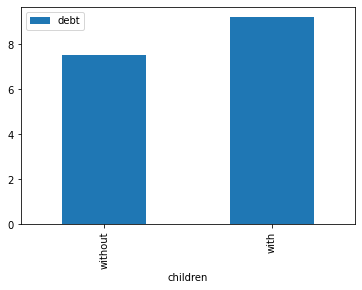

In [34]:
pd.DataFrame({'children': ["without", "with"], 'debt': [
    data[data['children'] == 0]['debt'].mean() * 100, 
    data[data['children'] != 0]['debt'].mean() * 100
]}).plot(x = 'children', y = 'debt', kind = "bar")

<AxesSubplot:xlabel='children'>

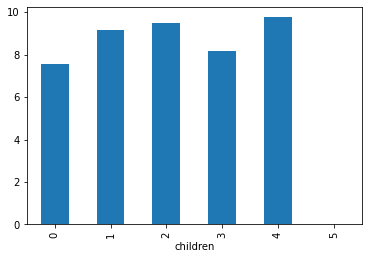

In [35]:
# для наглядности:
grouped_by_children.plot(kind = "bar")

**Вывод**: Прослеживается зависимость: в среднем у бездетных количество задолженностей меньше, по мере увеличения количества детей платежеспособность снижается, за исключением заемщиков с 3-мя детьми - у них процент невозврата почти такой же низкий, как у бездетных, и существенно ниже, чем у семей с 2-мя или 4-мя детьми. Вероятнее всего, данных по 4-детным заемщикам недостаточно для статически-значимых выводов, так как на малых данных высока вероятность случайных отклонений. Логично было бы предположить, что при наличии 3-х и более детей риск невозврата постепенно снижается, но данных для проверки такой гипотезы не хватает. 

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [36]:
# вычисляем средний процент невозвращенных долгов в зависимости от семейного положения, сортируем по убыванию:
grouped_by_family = family_dict.groupby('family_status_id')['debt'].mean() * 100
grouped_by_family.sort_values()


family_status_id
2    6.569343
3    7.112971
0    7.545182
1    9.347145
4    9.750890
Name: debt, dtype: float64

In [37]:
{index + 0:value for index, value in enumerate(data['family_status'].unique())}

{0: 'женат / замужем',
 1: 'гражданский брак',
 2: 'вдовец / вдова',
 3: 'в разводе',
 4: 'Не женат / не замужем'}

<AxesSubplot:xlabel='family_status_id'>

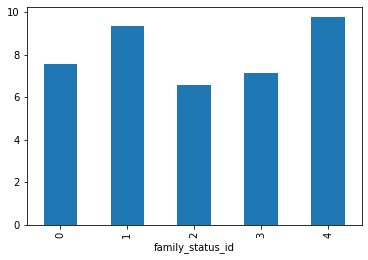

In [38]:
grouped_by_family.plot(kind = "bar")


**Вывод**: Жизненный цикл: свобода - гражданский брак - официальный брак - развод - вдовство
           сопровождается неуклонным ростом платежеспособности. Вероятнее всего, здесь ещё и с возрастом корреляция есть. 

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [39]:
# в зависимости от величины дохода:
grouped_by_income = total_income_dict.groupby('total_income_id')['debt'].mean() * 100
grouped_by_income.sort_values()



total_income_id
4    7.140194
1    7.960477
3    8.643343
2    8.732139
Name: debt, dtype: float64

<AxesSubplot:xlabel='total_income_id'>

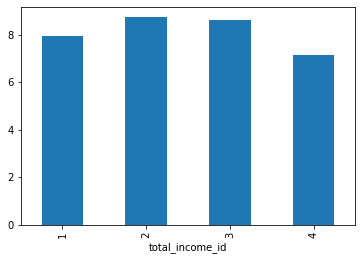

In [40]:
grouped_by_income.plot(kind = "bar")

# 1 - до 107 623
# 2 - до 142 594
# 3 - до 195 820
# 4 - выше

In [41]:
# проверяем, достаточно ли данных по каждой из категорий заемщиков:
total_income_dict['total_income_id'].value_counts()
# достаточная выборка по каждой из категорий

3    6317
4    5364
1    5364
2    4409
Name: total_income_id, dtype: int64

**Вывод**: последовательной зависимости (больше доход - больше/меньше платежеспособность) не выявлено, самыми неплатежеспособными оказываются заемщики со средним (относительно других заемщиков банка) доходом. Вероятно, тут есть корреляция с целями кредита, видом занятости, возрастом. 

- Как разные цели кредита влияют на его возврат в срок?

In [42]:
grouped_by_purpose = purpose_dict.groupby('purpose_id')['debt'].mean() * 100
grouped_by_purpose.sort_values()

purpose_id
1    7.233373
4    8.003442
2    9.220035
3    9.359034
Name: debt, dtype: float64

In [43]:
{index + 1:value for index, value in enumerate(data['purpose_grouped'].unique())}

{1: 'недвижимость', 2: 'автомобиль', 3: 'образование', 4: 'свадьба'}

<AxesSubplot:xlabel='purpose_id'>

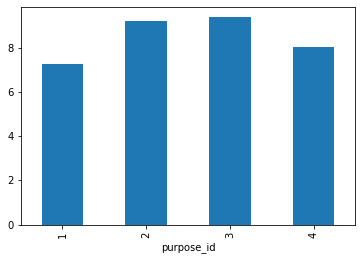

In [44]:
grouped_by_purpose.plot(kind = "bar")


**Вывод**: Самый низкий процент невозвратов  - по кредитам на недвижимость, что вероятно объясняется тем, что такие кредиты выдаются под залог самой недвижимости. 

## Шаг 4. Общий вывод:  
Рейтинг факторов, влияющих на платежеспособность заемщиков (в порядке убывания):
1. Семейное положение (6.5%  - минимальный показатель невозвратов, 9.7% - максимальный, разница - 3.2% );
2. Цель кредита (7.2% - минимальный показатель, 9.3% - максимальный, разница - 2.1%);
3. Наличие/отсутствие детей (7.5% - минимальный показатель, 9.2% - максимальный, разница - 1.7%);
4. Уровень дохода (7.1% - минимальный показатель,8.7% - максимальный, разница - 1.6%).